<a href="https://colab.research.google.com/github/1920643/1920643.github.io/blob/main/Project_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import tools that we will need:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

Cleaning the data 

In [3]:
data=pd.read_csv('https://raw.githubusercontent.com/1920643/1920643.github.io/main/HappinessVsMoneyWorldData.csv')
data

,Country name,LadderScore,GNIperCapita,GDPperCapita
0,Finland,7.8087,51680.0,50810.52741
1,Denmark,7.6456,62600.0,60551.64017
2,Switzerland,7.5599,69190.0,71760.58621
3,Iceland,7.5045,53590.0,55224.6848
4,Norway,7.4880,66110.0,63287.60701
...,...,...,...,...
148,Central African Republic,3.4759,1020.0,987.276727
149,Rwanda,3.3123,2160.0,2213.003654
150,Zimbabwe,3.2992,3420.0,3536.034132
151,South Sudan,2.8166,..,..


In [8]:
#changing the data into numeric values
data['GNIperCapita'] = pd.to_numeric(data['GNIperCapita'],errors='coerce')
data['LadderScore'] = pd.to_numeric(data['LadderScore'],errors='coerce')

#dropping missing values
cleanData = data.dropna()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


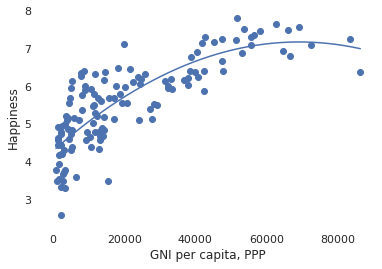

In [35]:
#assign x and y values
x = cleanData['GNIperCapita']
y = cleanData['LadderScore']

# change the order of the polynomial regression to 2 for the best fit
poly_model = make_pipeline(PolynomialFeatures(2),
                           LinearRegression())
poly_model.fit(x[:, np.newaxis], y)
xfit = np.linspace(min(x), max(x), 1000)
yfit = poly_model.predict(xfit[:, np.newaxis])
plt.scatter(x, y)
plt.plot(xfit, yfit);

# axis titles
plt.ylabel('Happiness')
plt.xlabel('GNI per capita, PPP')

# plot the points and the line
ax = plt.subplot(111)
ax.set_facecolor('white')


Creating new dataset with fitted values

In [40]:
#creating new dataframe with fitted line
fittedData = pd.DataFrame(data=np.linspace(min(x), max(x), 1000), columns = ['GNIfitted'])

# add column for the y values of the fitted line
fittedData['LSfitted'] = yfit
fittedData

,GNIfitted,LSfitted
0,770.000000,4.346085
1,855.765766,4.353147
2,941.531532,4.360200
3,1027.297297,4.367244
4,1113.063063,4.374280
...,...,...
995,86106.936937,6.995541
996,86192.702703,6.993795
997,86278.468468,6.992041
998,86364.234234,6.990278


In [43]:
#download fitted dataset to csv
fittedData[['GNIfitted','LSfitted']].to_csv("happinessGNIline.csv")
#download clean data to csv
cleanData.to_csv('happinessGNI.csv')